In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

In [4]:
tf.__version__

'2.9.1'

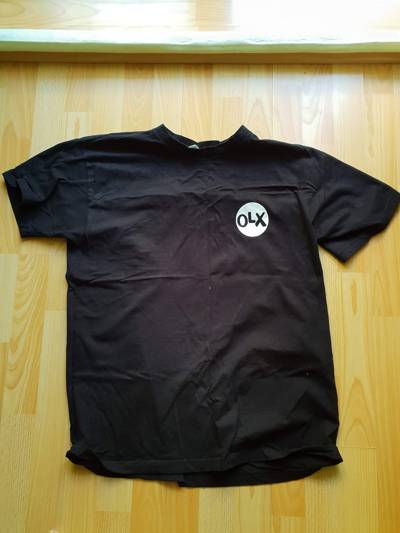

In [6]:
path = "./clothing-dataset-small/train/t-shirt"
name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
fullname = f"{path}/{name}"
load_img(fullname)

In [7]:
img = load_img(fullname, target_size=(299, 299))

In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

## Pre-trained CNNs

In [24]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [11]:
model = Xception(weights="imagenet", input_shape=(299, 299, 3))

2023-11-13 21:10:35.146031: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-13 21:10:35.152844: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-13 21:10:35.153460: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-13 21:10:35.154451: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

91884032/91884032 [==============================] - 2s 0us/step


In [20]:
X = np.array([x])
X = preprocess_input(X)
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804]],

       [[ 0.47450984,  0.4039216 , -0.1372549 ],
        [ 0.4666667 ,  0.39607847, -0.14509803],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [23]:
pred = model.predict(X)
pred.shape

1/1 [==============================] - 0s 22ms/step


(1, 1000)

In [25]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 1us/step


[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

## Transfer learning

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train", target_size=(150, 150), batch_size=32
)

Found 3068 images belonging to 10 classes.


In [30]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [31]:
!ls -l clothing-dataset-small/train

total 268
drwxr-sr-x 2 jovyan jovyan 20480 Nov 13 19:59 dress
drwxr-sr-x 2 jovyan jovyan 12288 Nov 13 19:59 hat
drwxr-sr-x 2 jovyan jovyan 36864 Nov 13 19:59 longsleeve
drwxr-sr-x 2 jovyan jovyan 20480 Nov 13 19:59 outwear
drwxr-sr-x 2 jovyan jovyan 36864 Nov 13 19:59 pants
drwxr-sr-x 2 jovyan jovyan 24576 Nov 13 19:59 shirt
drwxr-sr-x 2 jovyan jovyan 20480 Nov 13 19:59 shoes
drwxr-sr-x 2 jovyan jovyan 20480 Nov 13 19:59 shorts
drwxr-sr-x 2 jovyan jovyan 12288 Nov 13 19:59 skirt
drwxr-sr-x 2 jovyan jovyan 69632 Nov 13 19:59 t-shirt


In [32]:
X, y = next(train_ds)

In [33]:
X.shape  # 32 images, 150x150 (image size in pixels), 3(R, G, B) representation

(32, 150, 150, 3)

In [35]:
y[:5]  # One-hot encoding of labels

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
)

Found 341 images belonging to 10 classes.


In [63]:
# Keras: bottom = CNN + vector representation
# Keras: top = dense layers + prediction
base_model = Xception(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

base_model.trainable = False  # We are just using this to obtain the vector representation using the pre-trained model

In [52]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)

outputs = base

model = keras.Model(inputs, outputs)

In [53]:
preds = model.predict(X)

1/1 [==============================] - 1s 631ms/step


In [54]:
preds.shape
# 32 - Batch size
# 5 x 5 x 2048 - 2048 filters of a 5x5 size
# Goal: get a 1D vector representation. So, average the 5x5 representation to get a unique value.
# This is called: 2D Average Pooling

(32, 5, 5, 2048)

In [55]:
vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = vectors

model = keras.Model(inputs, outputs)
preds = model.predict(X)

1/1 [==============================] - 1s 635ms/step


In [56]:
preds.shape  # We get the vector representation of the 32 images that form the batch size

(32, 2048)

In [84]:
# Now, our objective is to create dense layers to come up with the prediction of our 10 labels
base_model = Xception(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [85]:
preds = model.predict(X)

1/1 [==============================] - 1s 627ms/step


In [86]:
preds.shape

(32, 10)

In [87]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)  # No softmax transformer

In [88]:
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [89]:
# Epoch: number of times we go over the data
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 15s 132ms/step - loss: 1.2740 - accuracy: 0.6679 - val_loss: 0.8780 - val_accuracy: 0.7625
Epoch 2/10
96/96 [==============================] - 12s 122ms/step - loss: 0.5781 - accuracy: 0.8214 - val_loss: 0.8504 - val_accuracy: 0.7654
Epoch 3/10
96/96 [==============================] - 12s 122ms/step - loss: 0.3445 - accuracy: 0.8859 - val_loss: 0.7566 - val_accuracy: 0.7830
Epoch 4/10
96/96 [==============================] - 12s 122ms/step - loss: 0.2202 - accuracy: 0.9250 - val_loss: 0.8763 - val_accuracy: 0.7859
Epoch 5/10
96/96 [==============================] - 12s 122ms/step - loss: 0.1502 - accuracy: 0.9462 - val_loss: 0.9534 - val_accuracy: 0.7918
Epoch 6/10
96/96 [==============================] - 12s 122ms/step - loss: 0.0997 - accuracy: 0.9648 - val_loss: 0.8479 - val_accuracy: 0.7889
Epoch 7/10
96/96 [==============================] - 12s 122ms/step - loss: 0.0726 - accuracy: 0.9769 - val_loss: 0.9865 - val_accuracy: 0.8299

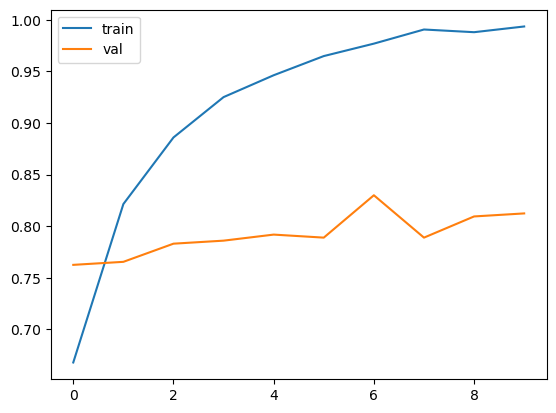

In [90]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()

## Learning rate

In [93]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    #############################################
    # ARQUITECTURE
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)  # Just one LAYER!
    model = keras.Model(inputs, outputs)

    #############################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

In [94]:
scores = {}
for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 15s 132ms/step - loss: 1.9401 - accuracy: 0.3279 - val_loss: 1.6063 - val_accuracy: 0.4780
Epoch 2/10
96/96 [==============================] - 12s 120ms/step - loss: 1.3859 - accuracy: 0.5665 - val_loss: 1.2390 - val_accuracy: 0.6305
Epoch 3/10
96/96 [==============================] - 12s 122ms/step - loss: 1.1356 - accuracy: 0.6434 - val_loss: 1.0543 - val_accuracy: 0.6774
Epoch 4/10
96/96 [==============================] - 12s 120ms/step - loss: 0.9934 - accuracy: 0.6864 - val_loss: 0.9378 - val_accuracy: 0.7214
Epoch 5/10
96/96 [==============================] - 12s 123ms/step - loss: 0.9003 - accuracy: 0.7128 - val_loss: 0.8637 - val_accuracy: 0.7331
Epoch 6/10
96/96 [==============================] - 12s 120ms/step - loss: 0.8313 - accuracy: 0.7337 - val_loss: 0.8117 - val_accuracy: 0.7595
Epoch 7/10
96/96 [==============================] - 12s 123ms/step - loss: 0.7798 - accuracy: 0.7451 - val_loss: 0.7709 - val_accuracy:

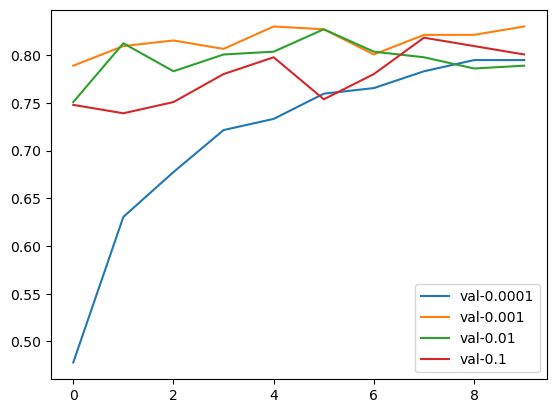

In [97]:
for lr, hist in scores.items():
    #     plt.plot(hist['accuracy'], label=f'train-{lr}')
    plt.plot(hist["val_accuracy"], label=f"val-{lr}")
    plt.legend()

In [99]:
# Remove learning rates that can be easily discarded
del scores[0.1]
del scores[0.0001]

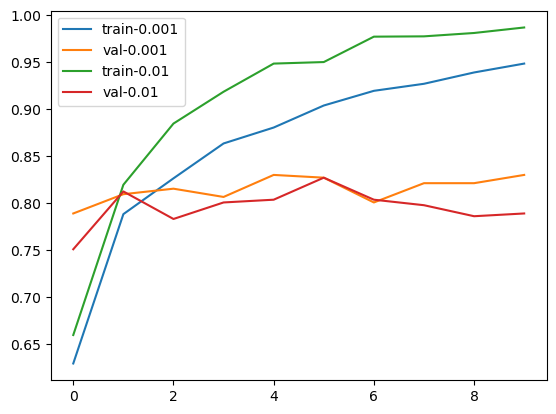

In [100]:
# Plot again to check competing parameters
for lr, hist in scores.items():
    plt.plot(hist["accuracy"], label=f"train-{lr}")
    plt.plot(hist["val_accuracy"], label=f"val-{lr}")
    plt.legend()

In [101]:
learning_rate = 0.001

## Checkpointing

In [ ]:
model.save_weights("model_v1.h5", save_format="h5")

In [103]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
)

In [104]:
learning_rate = 0.001
model = make_model(learning_rate)
history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/10
96/96 [==============================] - 15s 134ms/step - loss: 1.0857 - accuracy: 0.6346 - val_loss: 0.7149 - val_accuracy: 0.7713
Epoch 2/10
96/96 [==============================] - 12s 127ms/step - loss: 0.6251 - accuracy: 0.7832 - val_loss: 0.6273 - val_accuracy: 0.7889
Epoch 3/10
96/96 [==============================] - 12s 126ms/step - loss: 0.5076 - accuracy: 0.8272 - val_loss: 0.5816 - val_accuracy: 0.8123
Epoch 4/10
96/96 [==============================] - 12s 127ms/step - loss: 0.4353 - accuracy: 0.8611 - val_loss: 0.5519 - val_accuracy: 0.8182
Epoch 5/10
96/96 [==============================] - 12s 126ms/step - loss: 0.3684 - accuracy: 0.8898 - val_loss: 0.5417 - val_accuracy: 0.8270
Epoch 6/10
96/96 [==============================] - 12s 128ms/step - loss: 0.3261 - accuracy: 0.9051 - val_loss: 0.5341 - val_accuracy: 0.8299
Epoch 7/10
96/96 [==============================] - 12s 124ms/step - loss: 0.2888 - accuracy: 0.9211 - val_loss: 0.5278 - val_accuracy: 0.8270

## Adding more layers

In [106]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    #############################################
    # ARQUITECTURE
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)  # INNER LAYER

    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)

    #############################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

In [107]:
learning_rate = 0.001
scores = {}
for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

0.01
Epoch 1/10
96/96 [==============================] - 15s 135ms/step - loss: 1.5080 - accuracy: 0.4791 - val_loss: 1.2025 - val_accuracy: 0.5718
Epoch 2/10
96/96 [==============================] - 12s 122ms/step - loss: 1.0128 - accuracy: 0.6646 - val_loss: 0.9117 - val_accuracy: 0.6979
Epoch 3/10
96/96 [==============================] - 12s 124ms/step - loss: 0.8028 - accuracy: 0.7448 - val_loss: 0.7990 - val_accuracy: 0.7478
Epoch 4/10
96/96 [==============================] - 12s 122ms/step - loss: 0.6844 - accuracy: 0.7692 - val_loss: 0.7428 - val_accuracy: 0.7566
Epoch 5/10
96/96 [==============================] - 12s 122ms/step - loss: 0.5999 - accuracy: 0.8048 - val_loss: 0.7093 - val_accuracy: 0.7654
Epoch 6/10
96/96 [==============================] - 12s 123ms/step - loss: 0.5397 - accuracy: 0.8276 - val_loss: 0.7081 - val_accuracy: 0.7595
Epoch 7/10
96/96 [==============================] - 12s 123ms/step - loss: 0.4788 - accuracy: 0.8501 - val_loss: 0.6775 - val_accuracy: 0

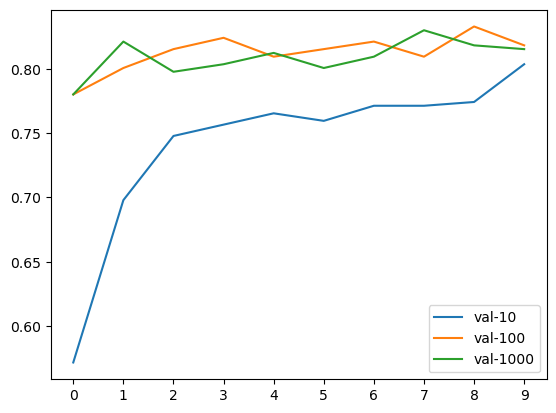

In [109]:
for size, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=f"val-{size}")

plt.xticks(np.arange(10))
plt.legend()

## Dropout and regularization

Dropout in Convolutional Neural Networks (CNNs) for image classification is a technique used to prevent overfitting. During training, dropout randomly 'turns off' a percentage of neurons in the network, meaning their contribution to the next layer is temporarily removed. This randomness forces the network to not rely too heavily on any one neuron and instead spread out its learning, making it more robust and less likely to overfit to the training data. It's like ensuring that the network doesn't get too fixated on specific details in the training images, thereby improving its ability to generalize to new, unseen images.

In [113]:
def make_model(learning_rate=0.01, size_inner=100, drop_rate=0.5):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    #############################################
    # ARQUITECTURE
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)  # INNER LAYER
    drop = keras.layers.Dropout(drop_rate)(
        inner
    )  # Percentage of neurons that will be turned off in each iteration

    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    #############################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

In [114]:
learning_rate = 0.001
size = 100

scores = {}

for drop_rate in [0.0, 0.2, 0.5, 0.8]:
    print(drop_rate)

    model = make_model(
        learning_rate=learning_rate, size_inner=size, drop_rate=drop_rate
    )
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[drop_rate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 15s 130ms/step - loss: 0.9436 - accuracy: 0.6770 - val_loss: 0.6117 - val_accuracy: 0.8035
Epoch 2/30
96/96 [==============================] - 12s 121ms/step - loss: 0.4827 - accuracy: 0.8347 - val_loss: 0.5355 - val_accuracy: 0.8123
Epoch 3/30
96/96 [==============================] - 12s 123ms/step - loss: 0.3311 - accuracy: 0.8934 - val_loss: 0.6145 - val_accuracy: 0.8065
Epoch 4/30
96/96 [==============================] - 12s 122ms/step - loss: 0.2427 - accuracy: 0.9224 - val_loss: 0.5510 - val_accuracy: 0.8299
Epoch 5/30
96/96 [==============================] - 12s 122ms/step - loss: 0.1654 - accuracy: 0.9583 - val_loss: 0.5922 - val_accuracy: 0.8240
Epoch 6/30
96/96 [==============================] - 12s 123ms/step - loss: 0.1074 - accuracy: 0.9788 - val_loss: 0.5881 - val_accuracy: 0.8299
Epoch 7/30
96/96 [==============================] - 12s 122ms/step - loss: 0.0732 - accuracy: 0.9889 - val_loss: 0.6186 - val_accuracy: 0.

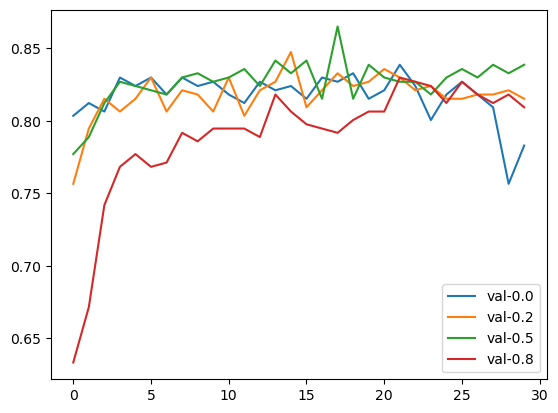

In [118]:
for drop_rate, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=f"val-{drop_rate}")

# plt.ylim(0.78, 0.9)
plt.legend()

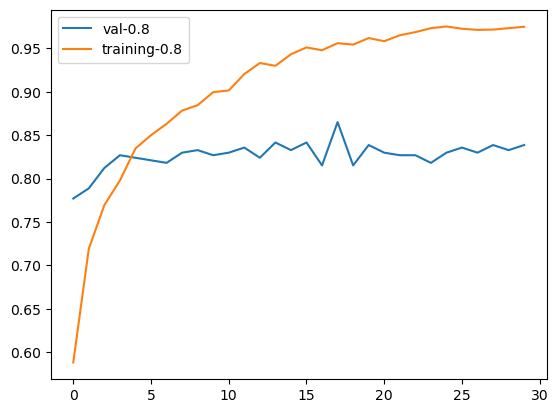

In [120]:
hist = scores[0.5]
plt.plot(hist["val_accuracy"], label=f"val-{drop_rate}")
plt.plot(hist["accuracy"], label=f"training-{drop_rate}")
plt.legend()

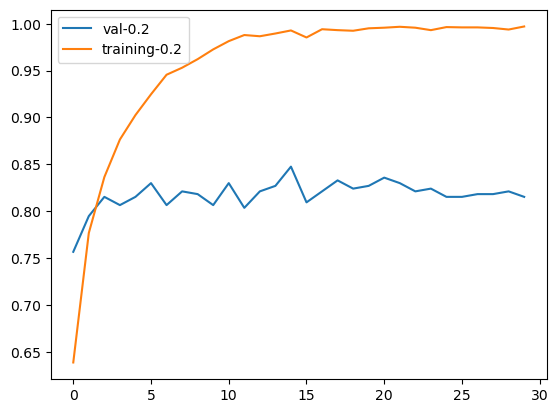

In [124]:
hist = scores[0.2]
plt.plot(hist["val_accuracy"], label=f"val-{0.2}")
plt.plot(hist["accuracy"], label=f"training-{0.2}")
plt.legend()

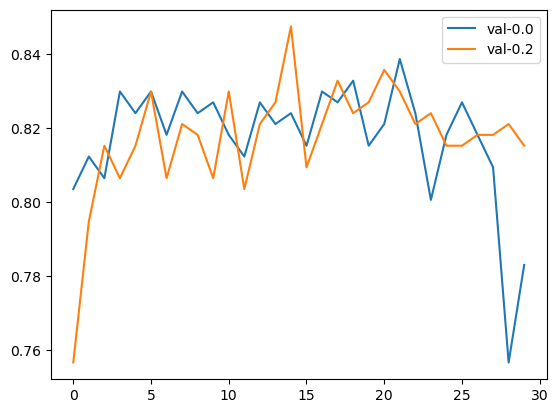

In [123]:
plt.plot(scores[0.0]["val_accuracy"], label=f"val-0.0")
plt.plot(scores[0.2]["val_accuracy"], label=f"val-0.2")
plt.legend()

# Decision: even if there's no significant improvement when using
# dropout, we are trying to combat overfitting, so drop_out of 0.2 is used.

## Data Augmentation
Data augmentation in Convolutional Neural Networks (CNNs) for image classification involves artificially expanding the training dataset by creating modified versions of the existing images. Techniques like rotating, scaling, cropping, flipping, or altering the color balance of the images are used. This process creates a more diverse set of training data, helping the CNN learn to recognize patterns and features in different contexts and orientations. The goal is to improve the model's ability to generalize and perform well on new, unseen images, reducing the risk of overfitting to the specific details of the original training set.

### Choosing augmentations

- Use your own judgment (horizontal flip might not make sense if all images are correctly placed).
- Look at the dataset, what kind of variations are there?
    - Are the objects always centered? If not, shifting or rotation might be neccesary
- Tune it as a hyperparameter
    - Train it for 10-20 epochs
    - Is it better? Yes? Use it, No? Don't use. Same?, train for more epochs.

In [125]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True,
)
train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train", target_size=(150, 150), batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [128]:
learning_rate = 0.001
size = 100
drop_rate = 0.2

model = make_model(learning_rate=learning_rate, size_inner=size, drop_rate=drop_rate)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 27s 261ms/step - loss: 1.3212 - accuracy: 0.5662 - val_loss: 0.8442 - val_accuracy: 0.7243
Epoch 2/50
96/96 [==============================] - 24s 251ms/step - loss: 0.9034 - accuracy: 0.6930 - val_loss: 0.6804 - val_accuracy: 0.7771
Epoch 3/50
96/96 [==============================] - 24s 252ms/step - loss: 0.7854 - accuracy: 0.7243 - val_loss: 0.6278 - val_accuracy: 0.8152
Epoch 4/50
96/96 [==============================] - 24s 252ms/step - loss: 0.7212 - accuracy: 0.7523 - val_loss: 0.6276 - val_accuracy: 0.7713
Epoch 5/50
96/96 [==============================] - 24s 251ms/step - loss: 0.6775 - accuracy: 0.7660 - val_loss: 0.6228 - val_accuracy: 0.7801
Epoch 6/50
96/96 [==============================] - 24s 251ms/step - loss: 0.5904 - accuracy: 0.7976 - val_loss: 0.5942 - val_accuracy: 0.8006
Epoch 7/50
96/96 [==============================] - 24s 249ms/step - loss: 0.5559 - accuracy: 0.8175 - val_loss: 0.6292 - val_accuracy: 0.7977

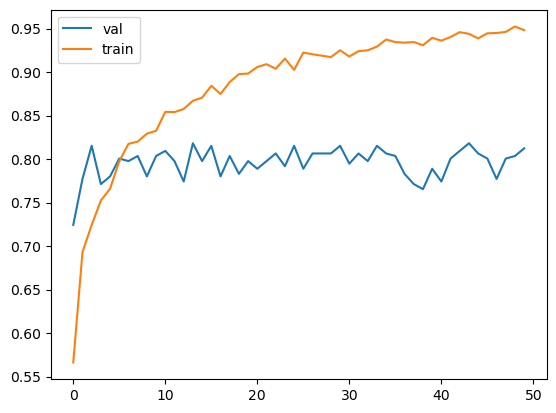

In [131]:
hist = history.history
plt.plot(hist["val_accuracy"], label="val")
plt.plot(hist["accuracy"], label="train")
plt.legend()
# Accuracy does not improve with augmentation

## Training a larger model

Train a 299x299 model

In [133]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, drop_rate=0.5):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(input_size, input_size, 3)
    )
    base_model.trainable = False

    #############################################
    # ARQUITECTURE
    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)  # INNER LAYER
    drop = keras.layers.Dropout(drop_rate)(
        inner
    )  # Percentage of neurons that will be turned off in each iteration

    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    #############################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

In [134]:
input_size = 299
# No data-augmentation is used, because it doesn't improve
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True,
)
train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train",
    target_size=(input_size, input_size),
    batch_size=32,
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False,
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [135]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
)

In [136]:
learning_rate = 0.001
size = 100
drop_rate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    drop_rate=drop_rate,
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 71s 700ms/step - loss: 1.1124 - accuracy: 0.6379 - val_loss: 0.5662 - val_accuracy: 0.8182
Epoch 2/50
96/96 [==============================] - 65s 680ms/step - loss: 0.7052 - accuracy: 0.7575 - val_loss: 0.4961 - val_accuracy: 0.8446
Epoch 3/50
96/96 [==============================] - 65s 680ms/step - loss: 0.5912 - accuracy: 0.8012 - val_loss: 0.4622 - val_accuracy: 0.8211
Epoch 4/50
96/96 [==============================] - 66s 683ms/step - loss: 0.5327 - accuracy: 0.8243 - val_loss: 0.4693 - val_accuracy: 0.8211
Epoch 5/50
96/96 [==============================] - 66s 681ms/step - loss: 0.4844 - accuracy: 0.8367 - val_loss: 0.4339 - val_accuracy: 0.8416
Epoch 6/50
96/96 [==============================] - 65s 678ms/step - loss: 0.4680 - accuracy: 0.8403 - val_loss: 0.4062 - val_accuracy: 0.8651
Epoch 7/50
96/96 [==============================] - 65s 676ms/step - loss: 0.4186 - accuracy: 0.8559 - val_loss: 0.3865 - val_accuracy: 0.8651

KeyboardInterrupt: 

## Using the model

- Load the model
- Evaluate the model
- Get predictions

In [138]:
model = keras.models.load_model("xception_v4_16_0.871.h5")

In [139]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(299, 299),
    batch_size=32,
    shuffle=False,
)

Found 341 images belonging to 10 classes.


In [140]:
# Evaluate the model
model.evaluate(test_ds)

11/11 [==============================] - 3s 208ms/step - loss: 0.3965 - accuracy: 0.8710


[0.3964889943599701, 0.8709677457809448]

In [141]:
path = "clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg"

In [142]:
img = load_img(path, target_size=(299, 299))

In [144]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [145]:
X = preprocess_input(X)
pred = model.predict(X)

1/1 [==============================] - 1s 737ms/step


In [146]:
classes = [
    "dress",
    "hat",
    "longsleeve",
    "outwear",
    "pants",
    "shirt",
    "shoes",
    "shorts",
    "skirt",
    "t-shirt",
]

In [147]:
dict(zip(classes, pred[0]))

{'dress': -4.035736,
 'hat': -7.0352383,
 'longsleeve': -2.1158202,
 'outwear': -2.2036486,
 'pants': 9.222283,
 'shirt': -3.5432694,
 'shoes': -4.838167,
 'shorts': 2.9079251,
 'skirt': -3.4669006,
 't-shirt': -5.6079764}

## Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them 

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images
